<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana María Aguilera Gómez y Alexia Marisol Díaz Verduzco.

**Fecha:** 21 de octubre del 2021.

**Expediente** : 720567 y .
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/anamaria1404/Tarea7y8_AMAguilera_AMDiaz

# Tarea 7: Clase 13

## Enunciado de tarea 
> Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$


In [1]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

### Paso 1:
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.

Código de solución estudiante 1

Código de solución estudiante 2

In [2]:
# MÉTODO MONTE CARLO CRUDO 
np.random.seed(555555)
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

# Términos
N = np.logspace(1,7,7,dtype=int)
# Valor real
I = 1/3 
# Intervalo de integración
a = 0
b = 1

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Aproximación por montecarlo
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))

In [3]:
# MÉTODO DE REDUCCIÓN DE VARIANZA DE MUESTREO ESTRATÍFICADO
np.random.seed(555555)
def muestreo_estratificado(N):
    '''
    Esta es la programación para aproximar el valor de la integral 
    usando el método de reducción de varianza de muestreo estratíficado.
    
    Parámetros
    -----------
    N: "cantidad de estratos"
    '''
    U2 = list(map(lambda N:np.random.uniform(a,b,N),N)) # generación de variables aleatorias en un intervalo
    BI= list(map(lambda N: np.arange(0,N),N)) 
    P= [(U2[i]-BI[i])/N[i] for i in range(len(N))] 
    
    return list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),P))
M_e = muestreo_estratificado(N)

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........

### Paso 2:
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:

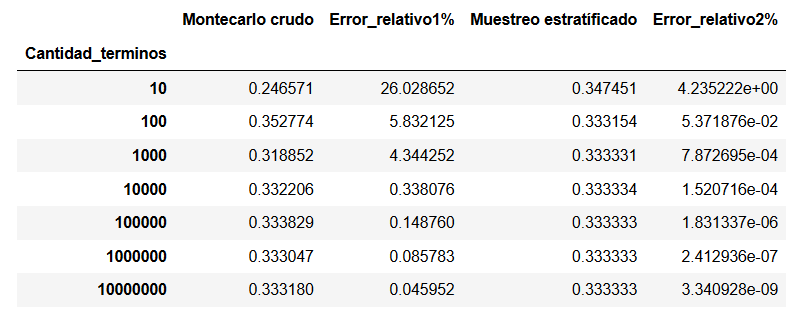

Código de solución estudiante 1

Código de solución estudiante 2

In [4]:
# Tabla 
df = pd.DataFrame(index=N,columns=['Monte Carlo Crudo', 'Error relativo1%','Muestreo Estratificado','Error relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,"Monte Carlo Crudo"] = I_m
df.loc[N,"Error relativo1%"] = round(np.abs(df.loc[N,"Monte Carlo Crudo"]-I)*100/I,5)
df.loc[N,"Muestreo Estratificado"] = M_e
df.loc[N,"Error relativo2%"] = round(np.abs(df.loc[N,"Muestreo Estratificado"]-I)*100/I,5)
df

,Monte Carlo Crudo,Error relativo1%,Muestreo Estratificado,Error relativo2%
Cantidad_terminos,,,,
10,0.449075,34.72259,0.236616,29.01506
100,0.358309,7.49280,0.322947,3.11594
1000,0.327402,1.77952,0.332336,0.29916
10000,0.333440,0.03199,0.333234,0.02991
100000,0.334143,0.24301,0.333323,0.00300
1000000,0.333427,0.02801,0.333332,0.00030
10000000,0.333491,0.04719,0.333333,0.00003


### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........